# Module 4 Section 1 Lab 1 - Liniear Regression

## Pendahuluan
Pertama, analisa regresi dapat kita gunakan untuk mengidentifikasi kekuatan pengaruh variabel independen ($x$) terhadap variabel dependen ($y$). Pertanyaan umum adalah "apa hubungan antara dosis dan efek, pengeluaran penjualan dan pemasaran, atau usia dan pendapatan".

Kedua, kita dapat menggunakannya untuk meramalkan efek atau dampak perubahan. Artinya, analisis regresi membantu kita untuk memahami seberapa besar variabel terikat berubah dengan perubahan dalam satu atau lebih variabel bebas. Pertanyaan umum adalah, “berapa banyak pendapatan penjualan tambahan yang saya dapatkan untuk setiap tambahan Rp. 1.000.000 yang dihabiskan untuk pemasaran?”.

Ketiga, analisis regresi memprediksi tren dan nilai masa depan. Analisis regresi dapat digunakan untuk mendapatkan estimasi titik. Pertanyaan umum adalah, “berapa harga emas dalam 6 bulan kedepan?".

## Tujuan
* Memahami intuisi *Linear Regression*
* Memahami Fungsi Biaya *Linear Regression*
* Memahami *Linear Regression* menggunakan Algoritma Gradient Descent
* Membuat model *Linear Regression* di Sklearn
* Metrik evaluasi untuk Regresi

# Dataset

Mari kita mulai dengan memuat dataset. Kita akan menggunakan dua file `.csv`. Satu hanya memiliki satu prediktor dan yang lainnya memiliki banyak prediktor. Karena variabel target adalah data kontinu, maka ini adalah yang terbaik untuk masalah regresi.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
# !wget https://raw.githubusercontent.com/ksnugroho/ai-mastery/main/dataset/house_prices.csv

In [2]:
df = pd.read_csv('dataset/house_prices.csv')
df.head()

,LotArea,SalePrice
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000


In [3]:
df.shape

(1326, 2)

# Variabel Prediktor dan Target

Bagaimana kita bisa mengatakan jika siswa akan masuk pergi ke perguruan tinggi peringkat 1, 2 atau 3?
 
Sederhana, jika seorang siswa bertekad untuk masuk ke perguruan tinggi peringkat 1, maka rata-rata nilai ujian nasional (NEM) yang tinggi akan mengarah ke siswa tersebut ke lebih banyak penerimaan perguruan tinggi (SNMPTN).

Moral dari cerita ini adalah terdapat faktor-faktor yang mempengaruhi hasil dari variabel yang kita minati. Contoh diatas:

* Nilai NEM -> Tingkat penerimaan Perguruan Tinggi

Faktor-faktor ini yang dikenal sebagai **Prediktor** dan variabel yang diinginkan dikenal sebagai **Target**. Untuk membuat prediksi, penting untuk mempelajari apa itu prediktor.

**Apa yang bisa menjadi prediktor untuk variabel target kita pada kasus House Pricing?**
Kita ingin melihat apakah harga rumah benar-benar dipengaruhi oleh luas rumah. Secara intuitif, kita semua tahu hasilnya, tetapi mari kita coba memahami mengapa kita melakukan ini.

Untuk membuktikan ini, kita akan membuat scatter plot.

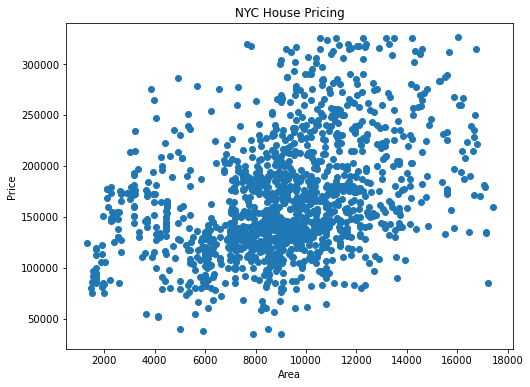

In [4]:
plt.figure(figsize=(8,6))
plt.scatter(df['LotArea'], df['SalePrice'])
plt.title('NYC House Pricing')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

Apakah ada hubungan?

Dengan melihat grafik diatas, kita dapat melihat tren kenaikan harga rumah seiring dengan bertambahnya luas rumah. Sehingga, kita dapat mengatakan bahwa ketika luas sebuah rumah meningkat, harganya juga meningkat.

Sekarang, misalkan kita ingin memprediksi harga rumah yang luasnya 14.000 kaki persegi, bagaimana caranya?

In [ ]:
df.corr()

# Membuat Garis Regresi pada Scatter Plot

Secara intuitif, kita hanya dapat menggambar garis lurus yang akan "menangkap" tren area dan harga rumah, dan memprediksi harga rumah dari garis tersebut.

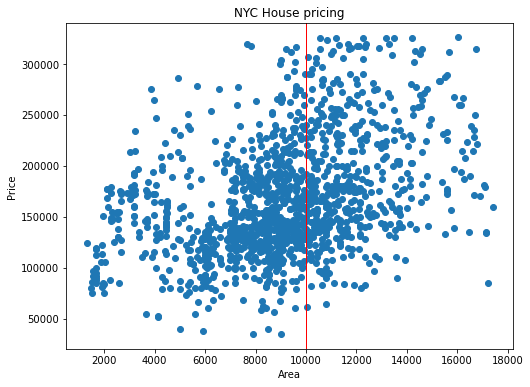

In [5]:
plt.figure(figsize=(8,6))
plt.scatter(df['LotArea'], df['SalePrice'])
plt.axvline(x=10000, linewidth='1', color='r')
plt.title('NYC House pricing')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

## Garis mana yang harus dipilih?

Seperti yang kita lihat, ada banyak kemungkinan garis yang tampaknya cukup pas. Kita akan mempertimbangkan garis berikut:

$$ 
price = 30000 + 15∗area\\
price = 10000 + 17 ∗ area\\
price = 50000 + 12 ∗ area
$$

Mari kita coba dan plot mereka dan lihat bagaimana hasilnya.

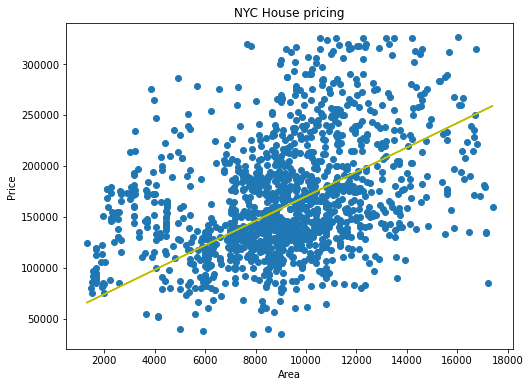

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(df['LotArea'], df['SalePrice'])
# plt.plot(df['LotArea'], 30000 + 15*df['LotArea'], "r-")
# plt.plot(df['LotArea'], 10000 + 17*df['LotArea'], "g-")
plt.plot(df['LotArea'], 50000 + 12*df['LotArea'], "y-")
plt.title('NYC House pricing')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

Sepertinya semuanya cocok untuk data. Mari kita plot semuanya dalam satu plot dan lihat bagaimana hasilnya.

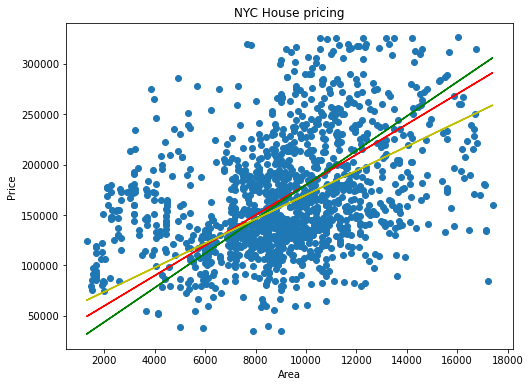

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(df['LotArea'], df['SalePrice'])
plt.plot(df['LotArea'], 30000 + 15*df['LotArea'], "r-")
plt.plot(df['LotArea'], 10000 + 17*df['LotArea'], "g-")
plt.plot(df['LotArea'], 50000 + 12*df['LotArea'], "y-")
plt.title('NYC House pricing')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

Seperti yang kita lihat, meskipun ketiganya tampak cocok, mereka sangat berbeda satu sama lain. Dan pada akhirnya, mereka akan menghasilkan prediksi yang sangat berbeda.

Misalnya, untuk luas rumah = 9600, prediksi garis merah, hijau, dan kuning adalah:

In [13]:
print("Garis merah:", 30000 + 15*9600)         
print('Garis hijau:', 10000 + 17*9600)
print('Garis kuning:', 50000 + 12*9600)

Garis merah: 174000
Garis hijau: 173200
Garis kuning: 165200


## Garis mana yang terbaik?

Seperti yang kita lihat, prediksi harga bervariasi satu sama lain secara signifikan. Jadi bagaimana kita memilih garis terbaik?

Kita bisa mendefinisikan fungsi yang mengukur seberapa dekat atau jauh prediksi dari nilai sebenarnya. Jika kita menganggap nilai aktual dan prediksi sebagai titik dalam ruang, kita dapat menghitung jarak antara dua titik ini.

Fungsi ini didefinisikan sebagai:

$$(Y_{pred}-Y_{actual})^2$$

Semakin jauh titiknya, semakin jauh jaraknya dan semakin banyak nilai fungsinya. Ini dikenal sebagai **cost function** dan karena fungsi ini menangkap kuadrat jarak, ini dikenal sebagai **least-squares cost function**.

Idenya adalah untuk **meminimalkan** fungsi biaya untuk mendapatkan garis terbaik.




# Linear Regression
*Linear Regression* yang menggunakan **least-squared cost function** dikenal dengan **Ordinary Least Squared Linear Regression**. Hal ini memungkinkan kita untuk menganalisis hubungan antara dua variabel kuantitatif.

## Variabel Dependen & Independen
Sebelum melangkah lebih jauh, mari kita pelajari beberapa istilah penting yang sering digunakan:

Pada contoh ini, kita mencoba untuk melakukan prediksi harga rumah berdasarkan luas areanya. Maka kita dapat menentukan:
- Luas area sebagai adalah **Variabel Independen**.
- Harga adalah **Variabel Dependen**, karena nilai harga **tergantung** pada nilai luas area.

## Analisis Univariat & Multivariat
- Karena kita hanya menggunakan **1 prediktor** (Luas area) untuk memprediksi harga, maka metode disebut **regresi univariat**.
- Tetapi dalam dunia nyata, kita dapat menggunakan **2 atau lebih prediktor**. Regresi semacam itu disebut **regresi muiltivariat**.

## Formulasi
Kita akan mulai dengan menggunakan notasi berikut karena dapat membantu kita dalam merepresentasikan masalah dengan cara yang lebih ringkas.

- $x^{(i)}$ menunjukkan variabel prediktor - dalam kasus ini adalah luas area
- $y^{(i)}$ menunjukkan variabel target - dalam kasus ini adalah harga

Sepasang $(x^{(i)}$, $y^{(i)})$ disebut contoh satu data latih.

Mari kita pertimbangkan bahwa setiap kumpulan data yang diberikan berisi **"m"** contoh pelatihan atau Pengamatan

{$x^{(i)} , y^{(i)} ; i=1, . . . , m$} — disebut set pelatihan.

Dalam contoh ini, $m = 1326$ (jumlah baris). Misalnya, contoh data latih ke-2 adalah $(x(2) , y(2))$ sesuai dengan (9600,181500) atau baris kedua dari data.

# Cost Function - Mengapa Dibutuhkan?
Kasus yang ideal adalah ketika setiap titik di scatter plot jatuh langsung pada garis atau garis lurus melewati semua titik di plot kita, tetapi dalam kenyataannya itu sangat jarang terjadi. Kita dapat melihat bahwa untuk luas area Tertentu, ada perbedaan antara harga yang diberikan oleh titik data kita (yang merupakan data yang benar) dan garis (pengamatan yang diprediksi atau)

Jadi bagaimana kita secara matematis dapat menangkap perbedaan tersebut dan mewakilinya?

## Formulasi Cost Function
Kita memilih $\theta$ sehingga nilai prediksi sedekat mungkin dengan nilai sebenarnya. Kita dapat mendefinisikan fungsi matematika untuk menangkap perbedaan antara nilai yang diprediksi dan nilai aktual.

Fungsi ini dikenal sebagai cost function dan dilambangkan dengan $J(θ)$

$$J(θ) = \frac{1}{2m} \sum _{i=1}^m (h_\theta(X^{(i)})-Y^{(i)})^2$$

Dimana:
- $\theta$ adalah koefisien $x$ untuk model linier kita secara intuitif. Ini mengukur seberapa banyak perubahan satuan $x$ akan berdampak pada $y$.
- Kita perlu mencari nilai intersep dan koefisien sehingga fungsi biaya dapat diminimalkan.
- Kita melakukan ini dengan *Gradient Descent*

## Gradient Descent
Ingat, kita ingin meminimalkan $J(θ)$. Gradient Descent adalah metode iteratif yang dimulai dengan beberapa "nilai acak awal" untuk $\theta$ dan berulang kali mengubah untuk membuat $J(θ)$ lebih kecil, sampai diharapkan konvergen ke nilai yang meminimalkan $J(θ)$.

Pembaruan berulang kali dapat ditunjukkan dengan:

Ini berulang kali melakukan pembaruan pada seperti yang ditunjukkan:

$$ \theta_{j} := \theta_{j}-\alpha \frac{\partial }{\partial \theta_{j}}J(\theta) $$

Dimana:
- α disebut *learning rate*. Ini adalah algoritma yang sangat alami yang berulang kali mengambil langkah ke arah penurunan paling curam dari $J(θ)$.

Untuk mendapatkan nilai yang optimal, kita dapat melakukan algoritma *Batch Gradient Descent*:
1. Asumsikan inisial $\theta$
2. Hitung $h(θ)$ untuk $i=1$ sampai $m$
3. Hitung $J(θ)$. Berhenti ketika nilai $J(θ)$ mengasumsikan *global/local minima*
4. Hitung $\thinspace\sum_{i=1}^{m}(y^{(i)}-h_{\theta}(x^{(i)}))*x_{j}$ untuk semua $\theta_{j}'s$
5. Hitung $\thinspace\theta_{j}$ baru

# Linear Regression Menggunakan Scikit-Learn

Tentunya, dalam masalah nyata kita tidak perlu menghitung secara manual. Yang terpenting adalah kita dapat memahami intuisi dibalik model *Linear Regression*. Kita dapat menggunakan library Scikit-Learn untuk mempermudah pekerjaan. 


## *Univariate Linear Regression*

In [14]:
df.head()

,LotArea,SalePrice
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000


In [15]:
# Menentukan variabel X dan Y
X = df['LotArea']
X_rhesape = df.LotArea[:,np.newaxis]

y = df['SalePrice'].values

In [17]:
X_rhesape

array([[ 8450],
       [ 9600],
       [11250],
       ...,
       [ 9042],
       [ 9717],
       [ 9937]], dtype=int64)

### Latih Model Linear Regression (Univariate)

In [18]:
from sklearn.linear_model import LinearRegression

lin_reg_model = LinearRegression()              # Buat model regresi linear
lin_reg_model.fit(X_rhesape, y)                 # Latih model

y_pred = lin_reg_model.predict(X_rhesape)       # Melakukan prediksi

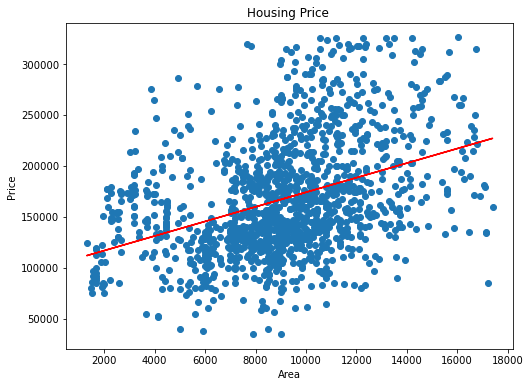

In [19]:
# Plot garis regresi terbaik
plt.figure(figsize=(8,6))
plt.scatter(X, y)
plt.plot(X, y_pred, "r-")
plt.title('Housing Price ')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

### Prediksi

Secara visual, sekarang kita memiliki perkiraan yang bagus tentang bagaimana area rumah dapat mempengaruhi harga rumah. Kita juga bisa membuat prediksi, dengan cara yang mudah tentunya!

Sebagai contoh: Jika kita ingin membeli rumah seluas 14.000 kaki persegi, kita cukup menggambar garis vertikal dari 14.000 ke atas ke garis perkiraan garis tren dan melanjutkan garis itu ke arah sumbu $y$

Perkiraan harga rumah adalah: [214314.37784865]


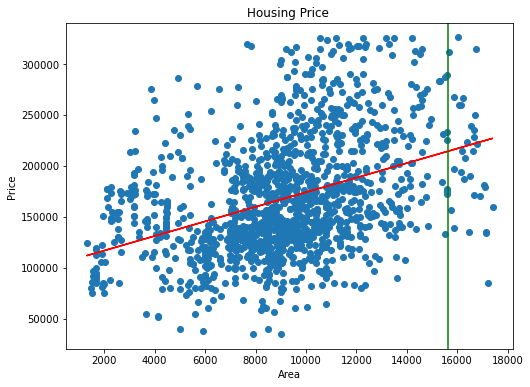

In [26]:
luas_tanah = float(input())
hasil = lin_reg_model.predict([[luas_tanah]])
print("Perkiraan harga rumah adalah:", hasil)

plt.figure(figsize=(8,6))
plt.scatter(X, y)
plt.plot(X, y_pred, "r-")
plt.title('Housing Price ')
plt.xlabel('Area')
plt.ylabel('Price')
plt.axvline(x=luas_tanah, c='g')
plt.show()

## Multivariate Linear Regression
Dalam *Univariate Linear Regression*, kita hanya menggunakan dua variabel. Satu sebagai variabel dependen dan lainnya sebagai variabel independen. Sekarang, kita akan menggunakan beberapa variabel dependen bukan untuk memprediksi harga rumah.

Notasi *Multivariate Linear Regression* dimodifikasi sebagai berikut:

$$ y = \theta_{0}+\theta_{1}x_{1}+\theta_{2}x_{2}+\cdots +\theta_{n}x_{n} $$

Jadi, selain area, kita juga akan mempertimbangkan variabel lain seperti Pool dll.

In [ ]:
!wget https://raw.githubusercontent.com/ksnugroho/ai-mastery/main/dataset/house_prices_multivariate.csv

In [27]:
df_2 = pd.read_csv('dataset/house_prices_multivariate.csv')
df_2.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,548,0,61,0,0,0,0,0,2008,208500
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,460,298,0,0,0,0,0,0,2007,181500
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,608,0,42,0,0,0,0,0,2008,223500
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,642,0,35,272,0,0,0,0,2006,140000
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,836,192,84,0,0,0,0,0,2008,250000


In [28]:
df_2.shape

(1379, 35)

In [29]:
X = df_2.iloc[:,:-1]    # Memilih semua kolom (fitur) kecuali kolom terakhir
y = df_2.SalePrice      # Kolom terakhir sebagai target

### Latih Model Linear Regression (Multivariate)

In [30]:
from sklearn.linear_model import LinearRegression

lin_reg_model = LinearRegression()      # Buat model regresi linear
lin_reg_model.fit(X, y)                 # Latih model

y_pred = lin_reg_model.predict(X)       # Melakukan prediksi

In [31]:
print("intercept:", lin_reg_model.intercept_)               # y-intercept 
print("coefficients of predictors:", lin_reg_model.coef_)   # Bobot atau koefisien regresi.

intercept: 310649.2600888221
coefficients of predictors: [ 4.21581098e+01  4.41367617e-01  1.77089455e+04  5.84597164e+03
  3.59658315e+02  1.19385237e+02  2.59435150e+01  9.76748897e+00
  7.65860419e-01 -6.61329857e-01  9.87201954e+00  1.96567898e+01
  1.31846867e+01 -4.66155079e+00  2.81799257e+01  6.78157998e+03
  3.36169287e+02  1.40344800e+03 -2.93573021e+03 -8.64074712e+03
 -3.35073713e+04  6.10172168e+03  3.20869122e+03 -8.23684306e+01
  1.56189970e+04  9.59392447e+00  2.51559075e+01  5.60981357e-01
  1.07712460e+01  2.51081902e+01  5.36124522e+01 -4.13099007e+01
 -8.16461371e-02 -5.83097021e+02]


### Prediksi

In [33]:
my_house = X.iloc[50]  # mengambil data untuk prediski
my_house

LotFrontage       110.0
LotArea          8472.0
OverallQual         5.0
OverallCond         5.0
YearBuilt        1963.0
YearRemodAdd     1963.0
MasVnrArea          0.0
BsmtFinSF1        104.0
BsmtFinSF2        712.0
BsmtUnfSF           0.0
TotalBsmtSF       816.0
1stFlrSF          816.0
2ndFlrSF            0.0
LowQualFinSF        0.0
GrLivArea         816.0
BsmtFullBath        1.0
BsmtHalfBath        0.0
FullBath            1.0
HalfBath            0.0
BedroomAbvGr        2.0
KitchenAbvGr        1.0
TotRmsAbvGrd        5.0
Fireplaces          0.0
GarageYrBlt      1963.0
GarageCars          2.0
GarageArea        516.0
WoodDeckSF        106.0
OpenPorchSF         0.0
EnclosedPorch       0.0
3SsnPorch           0.0
ScreenPorch         0.0
PoolArea            0.0
MiscVal             0.0
YrSold           2010.0
Name: 50, dtype: float64

In [34]:
pred_my_house = lin_reg_model.predict(my_house.values.reshape(1, -1))
print("Predicted value:", pred_my_house[0])

Predicted value: 118859.95116137224


In [35]:
print("Actual value:", y[50])

Actual value: 110000


Seperti yang kita lihat, nilai prediksi tidak terlalu jauh dari nilai sebenarnya. Sekarang mari kita coba memprediksi harga untuk semua rumah di dataset.

In [38]:
y_pred = lin_reg_model.predict(X)

y_pred[:10]

array([223165.2446233 , 193708.14702761, 216394.79759077, 197356.62505514,
       295125.75398645, 172516.96207704, 269477.13355183, 245198.81455232,
       168787.92247659,  87185.78920275])

Sekarang, kita letakkan nilai prediksi di sebelah nilai sebenarnya dan melihat seberapa bagus pekerjaan model yang telah kita kerjakan!

In [41]:
prices = pd.DataFrame({'actual': y, 'predicted': y_pred})
prices.sample(10)

,actual,predicted
328,437154,375063.318349
774,93000,77987.747129
218,216500,209341.094740
687,187500,207351.685824
699,180000,224866.174629
646,392000,255073.042434
1190,128900,111475.052532
1328,275000,261827.860368
612,350000,334315.482246
1332,230000,213884.175379


In [42]:
prices.to_csv('price_predict.csv', header=None)

### Mengukur Performa Model
Harus dikatakan bahwa kita telah melakukan pekerjaan yang cukup baik dalam memprediksi harga rumah. Namun, karena jumlah prediksi meningkat, akan sulit untuk secara manual memeriksa kecocokan. Dalam kasus seperti itu, kita dapat menggunakan *cost function* untuk memeriksa performa model.

In [43]:
from sklearn.metrics import r2_score

r2_score(y, y_pred)

0.8046479859403064

Mengevaluasi model akan membantu kita mengetahui seberapa baik pekerjaan (pemodelan) yang telah dilakukan. Ada tiga metrik evaluasi dasar untuk regresi:
- Mean Absolute Error (MAE)
- Root Mean Square Error (RMSE)
- R-Square (Residual value)